<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/lecture04_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
options(repr.plot.width=8, repr.plot.height=5)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(nycflights13)

## Questions from Piazza and the exit poll
- "I am still really confused about `ungroup()`

In [4]:
flights%>%
  group_by(year,month,day)%>%
  top_n(10,dep_delay)%>%
  print

# A tibble: 3,681 × 19
# Groups:   year, month, day [365]
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      848       1835     853    1001    1950     851 MQ     
 2  2013     1     1     1815       1325     290    2120    1542     338 EV     
 3  2013     1     1     1842       1422     260    1958    1535     263 EV     
 4  2013     1     1     1938       1703     155    2109    1823     166 EV     
 5  2013     1     1     1942       1705     157    2124    1830     174 MQ     
 6  2013     1     1     2006       1630     216    2230    1848     222 EV     
 7  2013     1     1     2115       1700     255    2330    1920     250 9E     
 8  2013     1     1     2205       1720     285      46    2040     246 AA     
 9  2013     1     1     2312       2000     192      21    2110     191 EV     
10  2013     1     1     2343       1724     379   

In [5]:
flights%>%
  group_by(year,month,day)%>%
  top_n(10,dep_delay)%>%
  head(20)%>%
  print
# 10 most delayed flights for 1/1, 10 most delayed flights for 1/2, so on

# A tibble: 20 × 19
# Groups:   year, month, day [2]
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      848       1835     853    1001    1950     851 MQ     
 2  2013     1     1     1815       1325     290    2120    1542     338 EV     
 3  2013     1     1     1842       1422     260    1958    1535     263 EV     
 4  2013     1     1     1938       1703     155    2109    1823     166 EV     
 5  2013     1     1     1942       1705     157    2124    1830     174 MQ     
 6  2013     1     1     2006       1630     216    2230    1848     222 EV     
 7  2013     1     1     2115       1700     255    2330    1920     250 9E     
 8  2013     1     1     2205       1720     285      46    2040     246 AA     
 9  2013     1     1     2312       2000     192      21    2110     191 EV     
10  2013     1     1     2343       1724     379     314

In [6]:
flights%>%
  group_by(year,month,day)%>%
  top_n(10,dep_delay)%>%
  count(carrier)%>%
  print
# how many times each carrier appeared in the top 10 of most delayed flights for each day 

# A tibble: 1,950 × 5
# Groups:   year, month, day [365]
    year month   day carrier     n
   <int> <int> <int> <chr>   <int>
 1  2013     1     1 9E          1
 2  2013     1     1 AA          1
 3  2013     1     1 EV          6
 4  2013     1     1 MQ          2
 5  2013     1     2 AA          2
 6  2013     1     2 EV          5
 7  2013     1     2 MQ          1
 8  2013     1     2 UA          2
 9  2013     1     3 9E          2
10  2013     1     3 AA          1
# … with 1,940 more rows


In [7]:
# but we want total count so we ungroup across all 365 days, nnot just each day 
flights%>%
  group_by(year,month,day)%>%
  top_n(10,dep_delay)%>%
  ungroup%>%
  count(carrier)%>%
  print

# A tibble: 16 × 2
   carrier     n
   <chr>   <int>
 1 9E        329
 2 AA        319
 3 AS          2
 4 B6        512
 5 DL        423
 6 EV        949
 7 F9         16
 8 FL         44
 9 HA          4
10 MQ        238
11 OO          1
12 UA        539
13 US         68
14 VX         86
15 WN        139
16 YV         12


# Lecture 4: Tidy Data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand what makes [tidy data](#Tidy-data) and why we care
* Make data wider and narrower
    
This lecture note corresponds to Chapter 6 of your book. 
</div>


    




So far in this class, we have learned how to use tools like `dplyr` and `ggplot` to manipulate and plot data. You may not have realized it, but the reason why it has been relatively easy to apply these tools to datasets like `nycflights13` is because all of the datasets we have examined have been in a special format. Today we will study that format in greater detail.

## Data in the real world
Unfortunately, most datasets in the real world do *not* come in a format which we can immediately load into R and analyze with tidyverse. [Here is a typical example](https://docs.google.com/spreadsheets/d/1AjOaPNJq-6AhHsbPqfExd_U5ENBYxKSJptahCMkKx9U/edit?usp=sharing) of a real-world dataset:

[image]

To analyze this data, we need it to look like:

    # A tibble: 194 x 6
        year month   day location    price quantity
       <dbl> <dbl> <dbl> <chr>       <dbl>    <dbl>
     1  2016     1     1 Bloomington  18.5    2631.
     2  2016     1     1 Muncie       18.5    2928.
     3  2016     1     1 Noblesville  18.5    2764.
     4  2016     1     8 Bloomington  11.5    2788.
     5  2016     1     8 Muncie       11.5    3162.
     6  2016     1     8 Noblesville  11.5    2751.
     7  2016     1    15 Bloomington  14.8    2989.
     8  2016     1    15 Muncie       14.8    2986.
     9  2016     1    15 Noblesville  14.8    2612.
    10  2016     1    22 Bloomington  13.7    2827.
    # ... with 184 more rows
    
This week we'll learn how to convert real-world data into an analyzable format, a process known as "tidying".

## Tidy data
There are many different ways to represent data in a table, but some are better than others.
We say that a data table is "[tidy](http://vita.had.co.nz/papers/tidy-data.pdf)" if:
- Each row represents an observation.
- Each column represents a variable.
- Each value gets its own cell.
- Each different type of data set gets its own table.

Data tables which are not tidy are called messy!
![http://r4ds.had.co.nz/images/tidy-1.png](http://r4ds.had.co.nz/images/tidy-1.png)

In the following, we are going to ouput several tables data.  These `table` data are part of your `tidyverse` package.

`table1` is a "tidy" dataset:

In [8]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [9]:
print(table1)

# A tibble: 6 × 4
  country      year  cases population
  <chr>       <int>  <int>      <int>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3 Brazil       1999  37737  172006362
4 Brazil       2000  80488  174504898
5 China        1999 212258 1272915272
6 China        2000 213766 1280428583


In [10]:
?table1
# turberculosis cases 

In the above data set, each column is a variable and every entries in the same column is of the same type. So therefore this data set is tidy.

Now let us take a look at the following data set obtained by merging the cases and population into the `type` variable.

Now let as look at a different version of `table1` which contains the same data:

In [11]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [12]:
print(table2)
# same data represented in a diff way 
# cases and population under type. this is confusing. 
# the previous table is so much simpler/cleaner 

# A tibble: 12 × 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


Is `table2` tidy? In the type column, you have two variables: cases and population.   For data to be tidy, each variable needs to be in each column.  So this data is messy.

How about the following table? 

In [13]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [14]:
table3%>%print
# messy b/c there's actually 2 values & a formula rn 

# A tibble: 6 × 3
  country      year rate             
* <chr>       <int> <chr>            
1 Afghanistan  1999 745/19987071     
2 Afghanistan  2000 2666/20595360    
3 Brazil       1999 37737/172006362  
4 Brazil       2000 80488/174504898  
5 China        1999 212258/1272915272
6 China        2000 213766/1280428583


The above table is also messy, because the counts for cases and population is defined as a division in the variable rate.  So this data is also messy, though arguably less so

In [15]:
print(table4a) # cases in one tibble
print(table4b) # population in another one
# there should be cases, populations, years columnns in one table 
# however, this is not a tibble b/c useful in seeing how cases & population changed over time, individually (increased)

# A tibble: 3 × 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766
# A tibble: 3 × 3
  country         `1999`     `2000`
* <chr>            <int>      <int>
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583


The above is a messy data, since each observation for different year is separated into columns. The data have also been split into two tables. This is not necessarily a messy thing to do, as we will see when we talk about relational data.

Recapping: tidy data means

* each observation has its own row
* each variable has its own column
* each value has its own cell

## Why we care about tidy data
- The tools we have learned so far all live in the `tidyverse`. 
- Why is it called by this funny name? It is a universe of R packages which all expect to recieve tidy data as input, and, where necessary, return tidy data as output. 
- You can think of tidy data as a sort of contract that everything in `tidyverse` respects. 
- In particular, this makes it possible to string many tidyverse commands together using `%>%`  without having to worry about whether they are all compatible.

For instance, let us calculate rate of cases per 10000 people for the data in `table1`.

In [16]:
mutate(table1, rate = cases / population * 10000) # rate of cases per 10000 peoplev

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


How would we calculate the `rate` variable using `table2`? 

In [17]:
print(table2)

# A tibble: 12 × 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [18]:
#  mutate(table2, rate=???)  not possible to use mutate

Summary commands like `summarize` and `count` also preserve tidy data:

In [19]:
count(table1, year, wt = cases) # compute no. of cases for each year
# these functions take tidy data & return tidy data. that's why it's part of the tidyverse 
# wt is weight. it takes the cases and sums them up 
# equivalent to grouping by year & then summarizing the cases 

year,n
<int>,<int>
1999,250740
2000,296920


`ggplot` also expects tidy data.  What if we plot a table with a messy data?

In [20]:
print(table2)
# again, this is a messy data 

# A tibble: 12 × 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


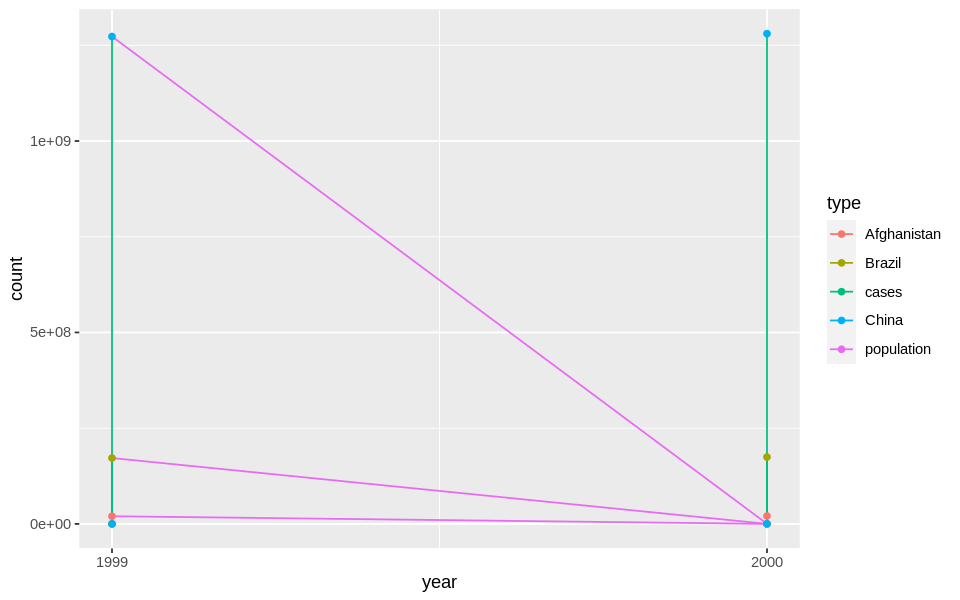

In [21]:
ggplot(table2, aes(x=year, y=count, color=type)) +
    geom_line(aes(group = country)) +
    geom_point(aes(color = country)) +
    scale_x_continuous(breaks=c(1999, 2000))
# notice, we now have a mix of countries, cases, & population (key/legend)
# this is why we need to clean/tidy our data 

## Creating tidy data
If the data is not already tidy, then we might need to some work before we can use the tools in `dplyr`. The package `tidyr` inside `tidyverse` allows one to convert data into the tidy data.

2 Methods to Tidy Data: 
- Pivot longer
- Pivot wider

### Making data longer
One common problem in when a variable is spread across multiple columns and we need to gather those columns to create a new pair of variables. For example, consider `table4a` from above:

In [22]:
print(table4a)
# wide table
# we want 1999 & 2000 to be a variable/column

# A tibble: 3 × 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766


In [23]:
?pivot_longer

In [24]:
table4a%>%
  pivot_longer(cols=c('1999','2000'))
# seems to be working fine 
# even if you had 10 yrs, they will only shrink to these 2 columns 
# name column doesn't actually make sense. should change this to year
# should change value to cases as well

country,name,value
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


Here there is a year variable which is spread across two columns. To become tidy, it should get its own `year` column. We want to make the data *longer* by taking the year columns and combining them into one column:
![gather illustration](http://r4ds.had.co.nz/images/tidy-9.png)

The command to do this is called `pivot_longer()`. To use it, we need to tell R three things:

* which existing columns correspond to values of a variable
* what is the name of the variable (the **key**) whose values currently appear as column names.
* what is the name of the variable (the **value**) whose values are currently spread over the cells.

(When using `pivot_longer()`, neither the **key** nor **value** column names currently exist in your data. They are "destination" columns in the new table.)

In [ ]:
# pivot table4a with default arguments

Notice how R chose default names "name" and "value" for the new columns it created. We can change those to be more informative using the options `names_to=` and `values_to=`:

In [33]:
# pivot table4a with informative column names
table4a%>%
  pivot_longer(cols=!c('country'),names_to='year',values_to='cases')
# we only have 2 yrs (1999 & 2000), but if we had multiple yrs, 
# we could do cols=!c('country') "everything except what i'm mentioning here"
# or we can do cols=c('1999':'2020')

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


### Exercise
Let us try to transform `table4b` to tidy format:

In [28]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


In [30]:
?pivot_longer

In [32]:
# pivot table4b to long format
table4b%>%
  pivot_longer(cols=c('1999','2000'),names_to='year',values_to='population')

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


## Wider data
Another type of problem is when an observation is scattered across multiple rows. Here we want to do the opposite of gather: we want to make the data **wider** by spreading these rows out into new columns.
![spread data](http://r4ds.had.co.nz/images/tidy-8.png)

The command to do this is called `pivot_wider`. To use it we need to specify two things:

* which existing column has the variable **names**
* which existing column has the **values** for those variables

### Exercise
Convert `table2` to tidy format using `pivot_wider()`. 

In [34]:
print(table2)

# A tibble: 12 × 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [37]:
?pivot_wider

In [40]:
# make table2 wider by separating cases and population into different columns
table2%>%
  pivot_wider(names_from=type,values_from=count)
# if type had influenza, covid, tb instead of just cases; then each of those values would've had their own columns 

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Summary

* `pivot_longer` tends to make wide tables narrower and longer
* `pivot_wider` tends to make long tables shorter and wider
* They are inverses -- each one undos the other.

Another use for these commands is to create data in a format that is better for humans to read. 
Some tables are more readable if they are put in a non-tidy format. This is often the case with time data.

### Exercise
Re-create the following table which shows monthly departures from the three NYC airports:
```
  origin 1    2    3     4     5     6     7     8     9    10    11   12  
1 EWR    9893 9107 10420 10531 10592 10175 10475 10359 9550 10104 9707 9922
2 JFK    9161 8421  9697  9218  9397  9472 10023  9983 8908  9143 8710 9146
3 LGA    7950 7423  8717  8581  8807  8596  8927  8985 9116  9642 8851 9067
```

In [42]:
# spread nycflights out to show departures by month for each airport
library(nycflights13)

In [43]:
flights%>%
  group_by(origin,month)%>%
  summarize(n=n())%>%
  print
# seems to be matching from the table above so far
# want to make this wider 
# what we did here is that we pulled specific columns from the flights dataset 

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


# A tibble: 36 × 3
# Groups:   origin [3]
   origin month     n
   <chr>  <int> <int>
 1 EWR        1  9893
 2 EWR        2  9107
 3 EWR        3 10420
 4 EWR        4 10531
 5 EWR        5 10592
 6 EWR        6 10175
 7 EWR        7 10475
 8 EWR        8 10359
 9 EWR        9  9550
10 EWR       10 10104
# … with 26 more rows


In [45]:
flights%>%
  group_by(origin,month)%>%
  summarize(n=n())%>%
  pivot_wider(names_from=month,values_from=n)%>%
  print

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


# A tibble: 3 × 13
# Groups:   origin [3]
  origin   `1`   `2`   `3`   `4`   `5`   `6`   `7`   `8`   `9`  `10`  `11`  `12`
  <chr>  <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
1 EWR     9893  9107 10420 10531 10592 10175 10475 10359  9550 10104  9707  9922
2 JFK     9161  8421  9697  9218  9397  9472 10023  9983  8908  9143  8710  9146
3 LGA     7950  7423  8717  8581  8807  8596  8927  8985  9116  9642  8851  9067


## Example: `gapminder`
`gapminder` is a library of socioeconomic data collected over time and across many different countries:

In [47]:
install.packages('gapminder')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
library(gapminder)
gapminder %>% print

# A tibble: 1,704 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 1,694 more rows


These data are in tidy format. We can easily do things like plot population over time (for example):

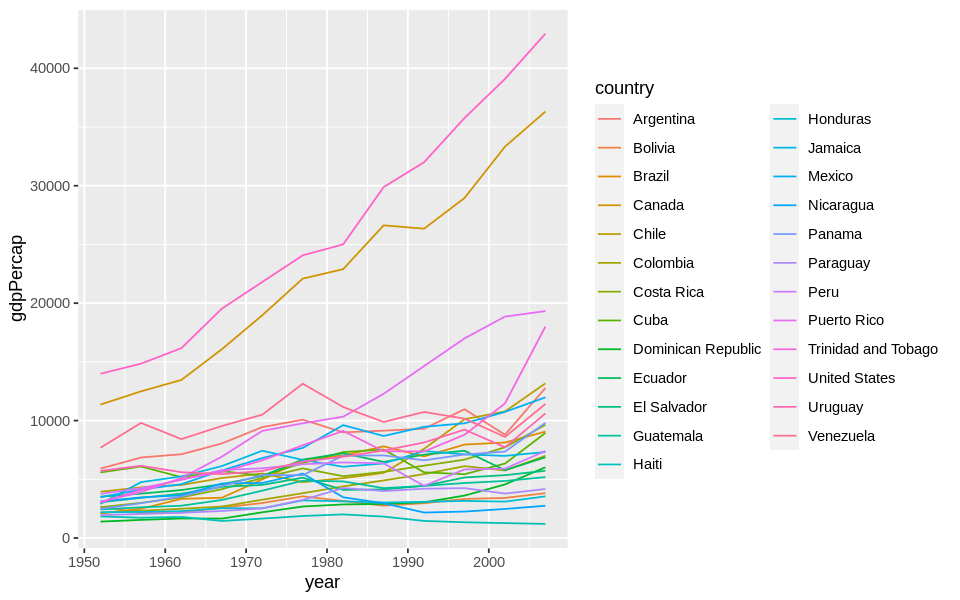

In [49]:
gapminder %>% filter(continent == "Americas") %>% 
    ggplot(aes(x=year, y=gdpPercap, color=country)) + 
      geom_line()
# filtering for just the americas, graph of year vs gdp, diff color/lines for diff countries (us, mexico)

With lots of different countries, it is (arguably) easier to present these data in tabular form. To do this, we need to untidy the data and place years along the horizontal axis:

    # A tibble: 142 × 13
       country `1952` `1957` `1962` `1967` `1972` `1977` `1982` `1987` `1992` `1997`
       <fct>    <int>  <int>  <int>  <int>  <int>  <int>  <int>  <int>  <int>  <int>
     1 Afghan… 8.43e6 9.24e6 1.03e7 1.15e7 1.31e7 1.49e7 1.29e7 1.39e7 1.63e7 2.22e7
     2 Albania 1.28e6 1.48e6 1.73e6 1.98e6 2.26e6 2.51e6 2.78e6 3.08e6 3.33e6 3.43e6
     3 Algeria 9.28e6 1.03e7 1.10e7 1.28e7 1.48e7 1.72e7 2.00e7 2.33e7 2.63e7 2.91e7
     4 Angola  4.23e6 4.56e6 4.83e6 5.25e6 5.89e6 6.16e6 7.02e6 7.87e6 8.74e6 9.88e6
     5 Argent… 1.79e7 1.96e7 2.13e7 2.29e7 2.48e7 2.70e7 2.93e7 3.16e7 3.40e7 3.62e7
     6 Austra… 8.69e6 9.71e6 1.08e7 1.19e7 1.32e7 1.41e7 1.52e7 1.63e7 1.75e7 1.86e7
     7 Austria 6.93e6 6.97e6 7.13e6 7.38e6 7.54e6 7.57e6 7.57e6 7.58e6 7.91e6 8.07e6
     8 Bahrain 1.20e5 1.39e5 1.72e5 2.02e5 2.31e5 2.97e5 3.78e5 4.55e5 5.29e5 5.99e5
     9 Bangla… 4.69e7 5.14e7 5.68e7 6.28e7 7.08e7 8.04e7 9.31e7 1.04e8 1.14e8 1.23e8
    10 Belgium 8.73e6 8.99e6 9.22e6 9.56e6 9.71e6 9.82e6 9.86e6 9.87e6 1.00e7 1.02e7 
    # … with 132 more rows, and 2 more variables: `2002` <int>, `2007` <int>

In [50]:
?pivot_wider

In [51]:
# pivot gapminder wider
gapminder%>%
  pivot_wider(names_from='year',values_from='gdpPercap')%>%
  print
# we have so many missing values now b/c lifeExp, pop for ech yr 
# if you don't want smth like this, 

# A tibble: 1,704 × 16
   country     contin…¹ lifeExp    pop `1952` `1957` `1962` `1967` `1972` `1977`
   <fct>       <fct>      <dbl>  <int>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghanistan Asia        28.8 8.43e6   779.    NA     NA     NA     NA     NA 
 2 Afghanistan Asia        30.3 9.24e6    NA    821.    NA     NA     NA     NA 
 3 Afghanistan Asia        32.0 1.03e7    NA     NA    853.    NA     NA     NA 
 4 Afghanistan Asia        34.0 1.15e7    NA     NA     NA    836.    NA     NA 
 5 Afghanistan Asia        36.1 1.31e7    NA     NA     NA     NA    740.    NA 
 6 Afghanistan Asia        38.4 1.49e7    NA     NA     NA     NA     NA    786.
 7 Afghanistan Asia        39.9 1.29e7    NA     NA     NA     NA     NA     NA 
 8 Afghanistan Asia        40.8 1.39e7    NA     NA     NA     NA     NA     NA 
 9 Afghanistan Asia        41.7 1.63e7    NA     NA     NA     NA     NA     NA 
10 Afghanistan Asia        41.8 2.22e7    NA     NA     NA     NA     NA     NA 
# … w

In [52]:
# filter out whatever we want: 
gapminder%>%
  select(country,gdpPercap,year)%>%
  pivot_wider(names_from='year',values_from='gdpPercap')%>%
  print

# A tibble: 142 × 13
   country `1952` `1957` `1962` `1967` `1972` `1977` `1982` `1987` `1992` `1997`
   <fct>    <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghan…   779.   821.   853.   836.   740.   786.   978.   852.   649.   635.
 2 Albania  1601.  1942.  2313.  2760.  3313.  3533.  3631.  3739.  2497.  3193.
 3 Algeria  2449.  3014.  2551.  3247.  4183.  4910.  5745.  5681.  5023.  4797.
 4 Angola   3521.  3828.  4269.  5523.  5473.  3009.  2757.  2430.  2628.  2277.
 5 Argent…  5911.  6857.  7133.  8053.  9443. 10079.  8998.  9140.  9308. 10967.
 6 Austra… 10040. 10950. 12217. 14526. 16789. 18334. 19477. 21889. 23425. 26998.
 7 Austria  6137.  8843. 10751. 12835. 16662. 19749. 21597. 23688. 27042. 29096.
 8 Bahrain  9867. 11636. 12753. 14805. 18269. 19340. 19211. 18524. 19036. 20292.
 9 Bangla…   684.   662.   686.   721.   630.   660.   677.   752.   838.   973.
10 Belgium  8343.  9715. 10991. 13149. 16672. 19118. 20980. 22526. 25576. 27561.
# … wit

In [53]:
# or use id_cols
gapminder%>%
  pivot_wider(id_cols=country,names_from='year',values_from='gdpPercap')%>%  
  print
# this makes each country is a unique observation, which is what we want. only one life exp & pop for ech country for ech yr 

# A tibble: 142 × 13
   country `1952` `1957` `1962` `1967` `1972` `1977` `1982` `1987` `1992` `1997`
   <fct>    <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghan…   779.   821.   853.   836.   740.   786.   978.   852.   649.   635.
 2 Albania  1601.  1942.  2313.  2760.  3313.  3533.  3631.  3739.  2497.  3193.
 3 Algeria  2449.  3014.  2551.  3247.  4183.  4910.  5745.  5681.  5023.  4797.
 4 Angola   3521.  3828.  4269.  5523.  5473.  3009.  2757.  2430.  2628.  2277.
 5 Argent…  5911.  6857.  7133.  8053.  9443. 10079.  8998.  9140.  9308. 10967.
 6 Austra… 10040. 10950. 12217. 14526. 16789. 18334. 19477. 21889. 23425. 26998.
 7 Austria  6137.  8843. 10751. 12835. 16662. 19749. 21597. 23688. 27042. 29096.
 8 Bahrain  9867. 11636. 12753. 14805. 18269. 19340. 19211. 18524. 19036. 20292.
 9 Bangla…   684.   662.   686.   721.   630.   660.   677.   752.   838.   973.
10 Belgium  8343.  9715. 10991. 13149. 16672. 19118. 20980. 22526. 25576. 27561.
# … wit

## Making wide data using more than one column
Consider the following simple table.

In [54]:
grades <- tribble(
    ~person, ~exam, ~q1, ~q2, ~q3,
    "alice", "mt1", 1, 2, 3.5,
    "alice", "mt2", .5, 2.5, 1.5,
    "bob", "mt1", 0.0, 1.0, 1.5,
    "bob", "mt2", 1.5, 2.5, 2.0
)

In [55]:
print(grades)

# A tibble: 4 × 5
  person exam     q1    q2    q3
  <chr>  <chr> <dbl> <dbl> <dbl>
1 alice  mt1     1     2     3.5
2 alice  mt2     0.5   2.5   1.5
3 bob    mt1     0     1     1.5
4 bob    mt2     1.5   2.5   2  


Suppose we want to expand this into multiple columns `q1_mt1`, `q2_mt2`, and so on. How should we use `pivot_wider()`?

In [56]:
# spread using multiple values
grades%>%
  pivot_wider(names_from=exam,values_from=c(q1,q2,q3))%>%
  print

# A tibble: 2 × 7
  person q1_mt1 q1_mt2 q2_mt1 q2_mt2 q3_mt1 q3_mt2
  <chr>   <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1 alice       1    0.5      2    2.5    3.5    1.5
2 bob         0    1.5      1    2.5    1.5    2  


## Some untidy examples
The `untidydata` package contains examples of untidy datasets:

In [ ]:
# install.packages("untidydata") won't work! instead use:
# remotes::install_github("jvcasillas/untidydata")
# (if you get an error, you need to `install.packages("remotes")` first)

In [57]:
remotes::install_github("jvcasillas/untidydata")

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpWUWZPF/remotesda3faefb17/jvcasillas-untidydata-0a0f627/DESCRIPTION’ ... OK
* preparing ‘untidydata’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘untidydata_0.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
library(untidydata)

In [59]:
print(language_diversity)

# A tibble: 444 × 4
   Continent Country      Measurement Value
   <chr>     <chr>        <chr>       <dbl>
 1 Africa    Algeria      Langs          18
 2 Africa    Angola       Langs          42
 3 Oceania   Australia    Langs         234
 4 Asia      Bangladesh   Langs          37
 5 Africa    Benin        Langs          52
 6 Americas  Bolivia      Langs          38
 7 Africa    Botswana     Langs          27
 8 Americas  Brazil       Langs         209
 9 Africa    Burkina Faso Langs          75
10 Africa    CAR          Langs          94
# … with 434 more rows


## &#129300; Quiz

The `language_diversity` dataset is:

<ol style="list-style-type: upper-alpha;">
    <li>Tidy!</li>
    <li>Untidy, because some rows represent multiple observations.</li>
    <li>Untidy, because some columns do not represent variables.</li>
    <li>Untidy, because some cells contain more than one value.</li>
    <li>Untidy for some other reason.</li> 
</ol>

In [ ]:
How should we go about tidying up this dataset?

## &#129300; Quiz

The measurements in `language_diversity` include:

<ol style="list-style-type: upper-alpha;">
    <li>Area</li>
    <li>Population</li>
    <li>Langs</li>
    <li>MGS</li>
    <li>Std</li> 
</ol>

In [ ]:
# tidy the language diversity dataset

## Example: Climate data

The [Global Historical Climate Network](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) is amazing database of daily weather data going back, in some cases, >100 years. I downloaded daily observation data for Ann Arbor from 1991 to present:

In [60]:
load(url("https://datasets.stats306.org/a2weather.RData"))
print(a2weather)

# A tibble: 11,304 × 128
   id        year month element VALUE1 MFLAG1 QFLAG1 SFLAG1 VALUE2 MFLAG2 QFLAG2
   <chr>    <int> <int> <chr>    <int> <chr>  <chr>  <chr>   <int> <chr>  <chr> 
 1 USC0020…  1891    10 TMAX       206 " "    " "    "6"       267 " "    " "   
 2 USC0020…  1891    10 TMIN        78 " "    " "    "6"       139 " "    " "   
 3 USC0020…  1891    10 PRCP        NA " "    " "    " "        NA " "    " "   
 4 USC0020…  1891    11 TMAX        78 " "    " "    "6"        28 " "    " "   
 5 USC0020…  1891    11 TMIN        11 " "    " "    "6"       -44 " "    " "   
 6 USC0020…  1891    11 PRCP         0 "P"    " "    "6"         0 "P"    " "   
 7 USC0020…  1891    11 SNOW         0 " "    " "    "6"         0 " "    " "   
 8 USC0020…  1891    12 TMAX        22 " "    " "    "6"        44 " "    " "   
 9 USC0020…  1891    12 TMIN       -94 " "    " "    "6"        11 " "    " "   
10 USC0020…  1892     1 TMAX       117 " "    " "    "6"        94 " "    " "   
# …

Questions about these data:
- What do the columns mean? What are the units? How can we find this information out?
- What questions can we ask about these data?
  - Are the data in an appropriate format to answer these questions?
  - If not, how can we get them there?

In [ ]:
# analysis of a2weather